In [2]:
from pydpmd.data import load
from pydpmd.plot import draw_particles_frame, create_animation, downsample
from correlation_functions import compute_shear_modulus, compute_stress_acf
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm

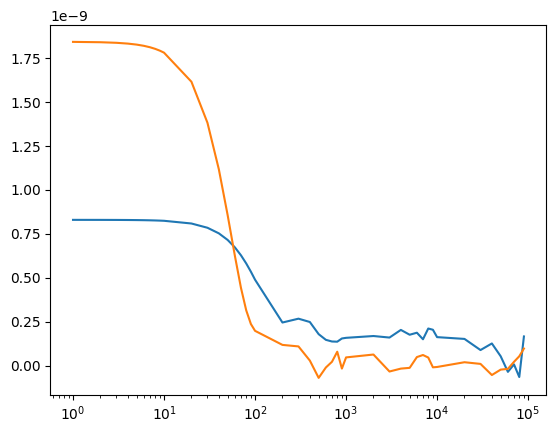

In [3]:
data_base = np.load('/home/mmccraw/dev/data/10-06-25/jamming/disk/dynamics-one-off-1/delta_phi_-1.000e-02_temp_1.000e-05.npz')
data_4x = np.load('/home/mmccraw/dev/data/10-06-25/jamming/disk/dynamics-one-off-2/delta_phi_-1.000e-02_temp_1.000e-05.npz')

for d in [data_base, data_4x]:
    G = d['G_no_sub'][:, :, 0]
    t = d['t']
    plt.plot(t, G[:, 1] + G[:, 2])


plt.xscale('log')

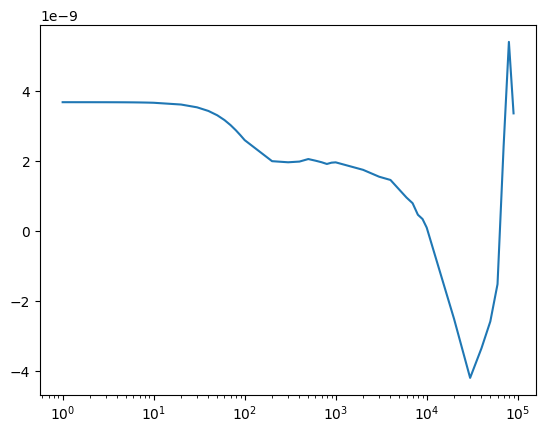

In [4]:
data = np.load('/home/mmccraw/dev/data/10-06-25/jamming/disk/dynamics-one-off-3/delta_phi_-1.000e-02_temp_1.000e-05.npz')

G = data['G'][:, :, 0]
t = data['t']
plt.plot(t, G[:, 0] + G[:, 3])
plt.xscale('log')

In [5]:
root = '/home/mmccraw/dev/data/10-06-25/jamming/disk/dynamics/'
dataset = {}
for path in os.listdir(root):
    if not path.endswith('.npz'):
        continue
    data = np.load(os.path.join(root, path))
    for k, v in data.items():
        if k not in dataset.keys():
            dataset.update({k: []})
        dataset[k].append(v)

df = pd.DataFrame(dataset)
df.temperature = df.temperature.astype(float)
df.delta_phi = df.delta_phi.astype(float)

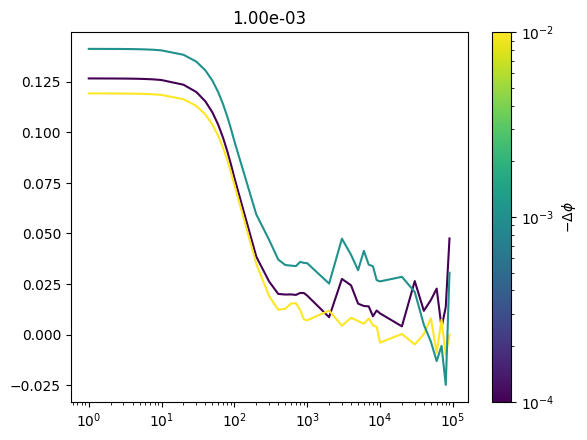

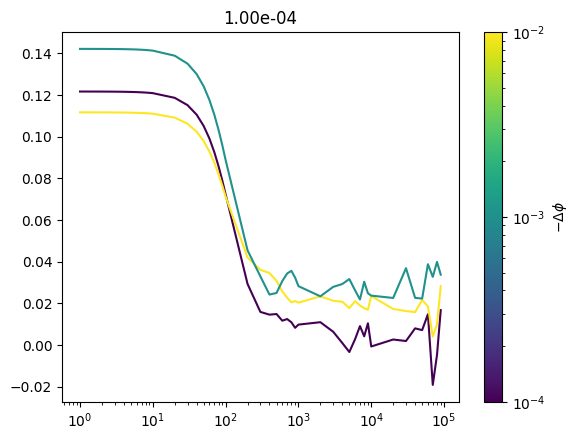

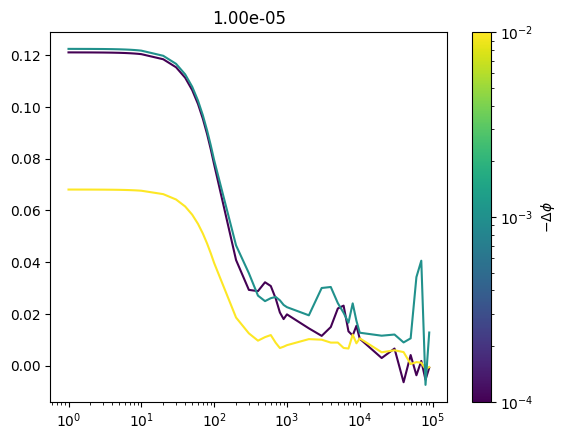

In [6]:
phi_norm = LogNorm(vmin=min(-df.delta_phi), vmax=max(-df.delta_phi))
cmap = plt.cm.viridis

for temperature in df.temperature.unique():
    for delta_phi in df.delta_phi.unique():
        mask = (df.temperature == temperature) & (df.delta_phi == delta_phi)
        if not np.any(mask):
            continue
        A = df[mask].A.values[0]
        T = np.mean(df[mask]['T'].values[0], axis=0)
        G = df[mask].G.values[0][:, :, 0] * A / T
        G_no_sub = df[mask].G_no_sub.values[0][:, :, 0] * A / T
        t = df[mask].t.values[0]
        
        plt.plot(t, (G_no_sub[:, 1] + G_no_sub[:, 2]) / 2, c=cmap(phi_norm(-delta_phi)))
        # plt.plot(t, (G_no_sub[:, 0] + G_no_sub[:, 3]) / 2, c=cmap(phi_norm(-delta_phi)))
        
        # plt.plot(t, (G[:, 1] + G[:, 2]) / 2, c=cmap(phi_norm(-delta_phi)))
        # plt.plot(t, (G[:, 0] + G[:, 3]) / 2, c=cmap(phi_norm(-delta_phi)))
    plt.xscale('log')
    sm = plt.cm.ScalarMappable(norm=phi_norm, cmap=cmap)
    sm.set_array(-df.delta_phi.unique())
    cbar = plt.colorbar(sm, ax=plt.gca(), label=r'$-\Delta \phi$')
    plt.title(f'{temperature:.2e}')
    plt.show()



In [2]:
data = load('/home/mmccraw/dev/data/10-06-25/jamming/disk/dynamics/delta_phi_-1.000e-02_temp_1.000e-03/', location=['final', 'init'], load_trajectory=True, load_full=False)

In [19]:
G, T, A, stress, t = compute_stress_acf(data, subtract_mean_stress=True)
# G * A / np.mean(T, axis=0)

Binned accumulation: 100%|██████████| 3999610/3999610 [00:05<00:00, 667017.90it/s] 


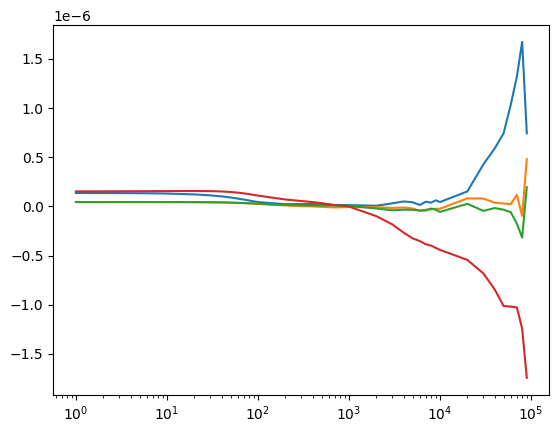

In [23]:
plt.plot(t, G[:, 0, 0])
plt.plot(t, G[:, 1, 0])
plt.plot(t, G[:, 2, 0])
plt.plot(t, G[:, 3, 0])
plt.xscale('log')

In [16]:
G, t = compute_shear_modulus(data, subtract_mean_stress=False)

Binned accumulation: 100%|██████████| 3999610/3999610 [00:05<00:00, 704721.59it/s] 


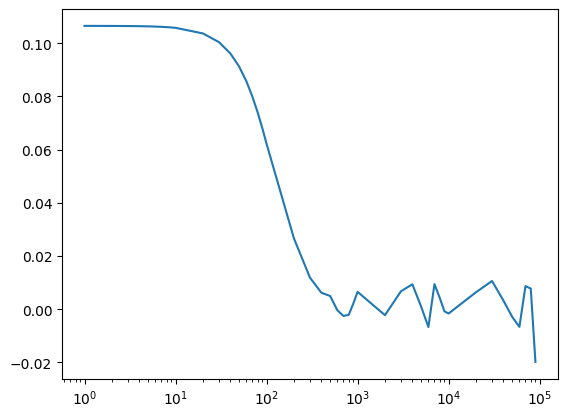

In [17]:
plt.plot(t, G)
plt.xscale('log')

In [ ]:
data = load('/home/mmccraw/dev/data/10-06-25/jamming/disk/dynamics/delta_phi_-1.000e-02_temp_1.000e-03/', location=['final', 'init'], load_trajectory=True, load_full=True)

desired_frames = 100
steps_to_animate = downsample(data, desired_frames)

output_path = "anim.gif"

# Create the animation using the downsampled steps
create_animation(
    update_func=draw_particles_frame,
    frames=steps_to_animate,
    filename=output_path,
    fps=15,
    bitrate=3000,
    data=data,
    system_id=0,
    use_pbc=True,
    which='particle',
    cmap_name='grey',
    id_scale=1.1
)